# Pairs Trading Strategy 

#####   Sarvesh Vishnu 

---


Pairs Trading Strategy explored in the fields of Healthcare, Medicine in the Indian Market. A part of the comprehensive culminating trading strategy project. 

In [ ]:
# Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 
import seaborn as sns 
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr 
import fix_yahoo_finance as yf 
yf.pdr_override()

In [ ]:
symbols = ['APOLLOHOSP.BO','KOVAI.BO','NGIND.BO','CMMHOSP.BO','ALCHEM.BO']

In [ ]:
start = '2017-01-01'
end = '2018-01-01'

In [ ]:
data = pdr.get_data_yahoo(symbols, start,end)['Adj Close']

[*********************100%***********************]  5 of 5 downloaded


In [ ]:
data.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
Date,,,,,
2017-01-02,22.500000,1169.544922,12.78,996.454407,64.997261
2017-01-03,23.799999,1183.646606,13.39,982.648315,64.868126
2017-01-04,23.500000,1197.158447,13.90,982.648315,65.126396
2017-01-05,23.450001,1185.857422,14.05,993.555542,65.341621
2017-01-06,24.200001,1175.047974,13.95,988.396729,63.878101


In [ ]:
data.columns

Index(['ALCHEM.BO', 'APOLLOHOSP.BO', 'CMMHOSP.BO', 'KOVAI.BO', 'NGIND.BO'], dtype='object')

In [ ]:
data.describe()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,17.472419,1162.312633,12.859073,1179.051237,69.146102
std,4.337927,87.127269,1.506869,97.581856,3.698426
min,10.680000,973.727234,10.600000,982.648315,58.024040
25%,14.225000,1083.483948,12.100000,1108.427155,67.033263
50%,15.700000,1177.844910,12.230000,1178.318054,68.478172
75%,22.150000,1230.741638,13.730000,1271.067749,70.896233
max,30.250000,1328.543579,17.110001,1409.313965,84.969925


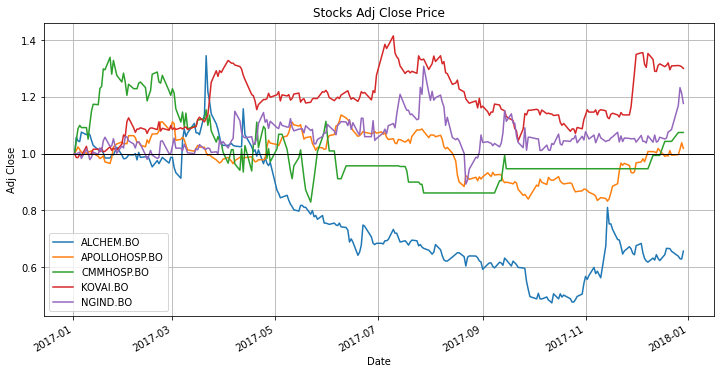

In [ ]:
normalize_stocks = data.apply(lambda x: x/x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color = 'black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid() 
plt.title("Stocks Adj Close Price")
plt.show()

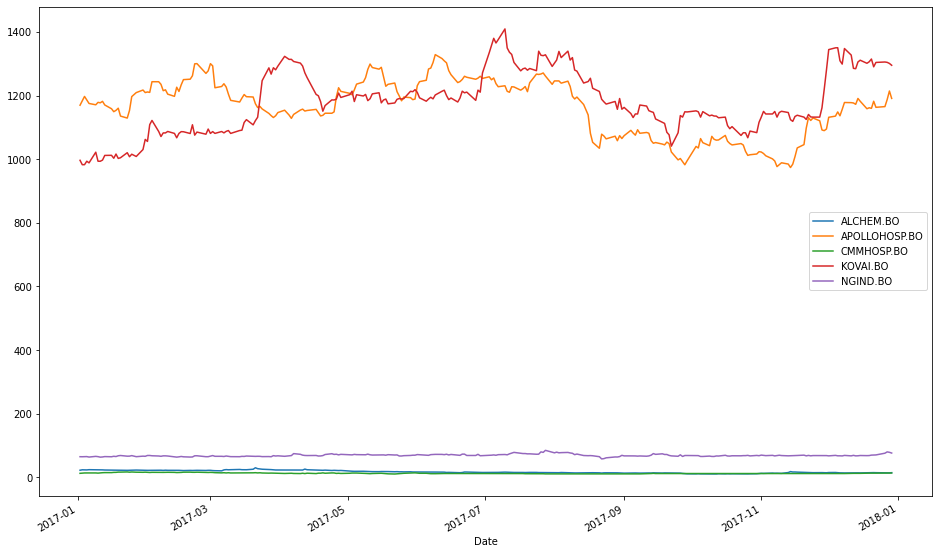

In [ ]:
data.plot(figsize = (16,10))

In [ ]:
corr_rest = data.corr() 
corr_rest 

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
ALCHEM.BO,1.000000,0.427128,0.689262,-0.292007,-0.277310
APOLLOHOSP.BO,0.427128,1.000000,0.289487,0.236557,0.304243
CMMHOSP.BO,0.689262,0.289487,1.000000,-0.514463,-0.347671
KOVAI.BO,-0.292007,0.236557,-0.514463,1.000000,0.561422
NGIND.BO,-0.277310,0.304243,-0.347671,0.561422,1.000000


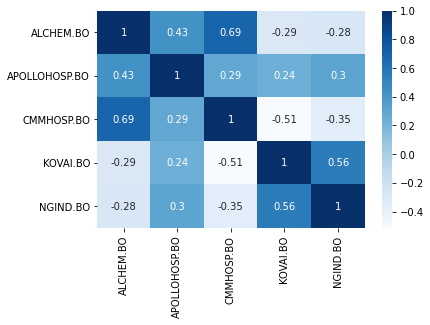

In [ ]:
sns.heatmap(corr_rest,annot=True, cmap="Blues")

In [ ]:
pair_value = corr_rest.abs().unstack() 
pair_value.sort_values(ascending = False)

NGIND.BO       NGIND.BO         1.000000
KOVAI.BO       KOVAI.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
               CMMHOSP.BO       0.689262
CMMHOSP.BO     ALCHEM.BO        0.689262
NGIND.BO       KOVAI.BO         0.561422
KOVAI.BO       NGIND.BO         0.561422
               CMMHOSP.BO       0.514463
CMMHOSP.BO     KOVAI.BO         0.514463
ALCHEM.BO      APOLLOHOSP.BO    0.427128
APOLLOHOSP.BO  ALCHEM.BO        0.427128
CMMHOSP.BO     NGIND.BO         0.347671
NGIND.BO       CMMHOSP.BO       0.347671
APOLLOHOSP.BO  NGIND.BO         0.304243
NGIND.BO       APOLLOHOSP.BO    0.304243
ALCHEM.BO      KOVAI.BO         0.292007
KOVAI.BO       ALCHEM.BO        0.292007
CMMHOSP.BO     APOLLOHOSP.BO    0.289487
APOLLOHOSP.BO  CMMHOSP.BO       0.289487
NGIND.BO       ALCHEM.BO        0.277310
ALCHEM.BO      NGIND.BO         0.277310
KOVAI.BO       APOLLOHOSP.BO    0.236557
APOLLOHOSP.BO  K

In [ ]:
corr_rest['ALCHEM.BO'].sort_values(ascending=False)

ALCHEM.BO        1.000000
CMMHOSP.BO       0.689262
APOLLOHOSP.BO    0.427128
NGIND.BO        -0.277310
KOVAI.BO        -0.292007
Name: ALCHEM.BO, dtype: float64

In [ ]:
corr_rest['APOLLOHOSP.BO'].sort_values(ascending=False)

APOLLOHOSP.BO    1.000000
ALCHEM.BO        0.427128
NGIND.BO         0.304243
CMMHOSP.BO       0.289487
KOVAI.BO         0.236557
Name: APOLLOHOSP.BO, dtype: float64

In [ ]:
corr_rest['CMMHOSP.BO'].sort_values(ascending=False)

CMMHOSP.BO       1.000000
ALCHEM.BO        0.689262
APOLLOHOSP.BO    0.289487
NGIND.BO        -0.347671
KOVAI.BO        -0.514463
Name: CMMHOSP.BO, dtype: float64

In [ ]:
corr_rest['KOVAI.BO'].sort_values(ascending=False)

KOVAI.BO         1.000000
NGIND.BO         0.561422
APOLLOHOSP.BO    0.236557
ALCHEM.BO       -0.292007
CMMHOSP.BO      -0.514463
Name: KOVAI.BO, dtype: float64

In [ ]:
corr_rest['NGIND.BO'].sort_values(ascending=False)

NGIND.BO         1.000000
KOVAI.BO         0.561422
APOLLOHOSP.BO    0.304243
ALCHEM.BO       -0.277310
CMMHOSP.BO      -0.347671
Name: NGIND.BO, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcadf561710>,
      dtype=object)

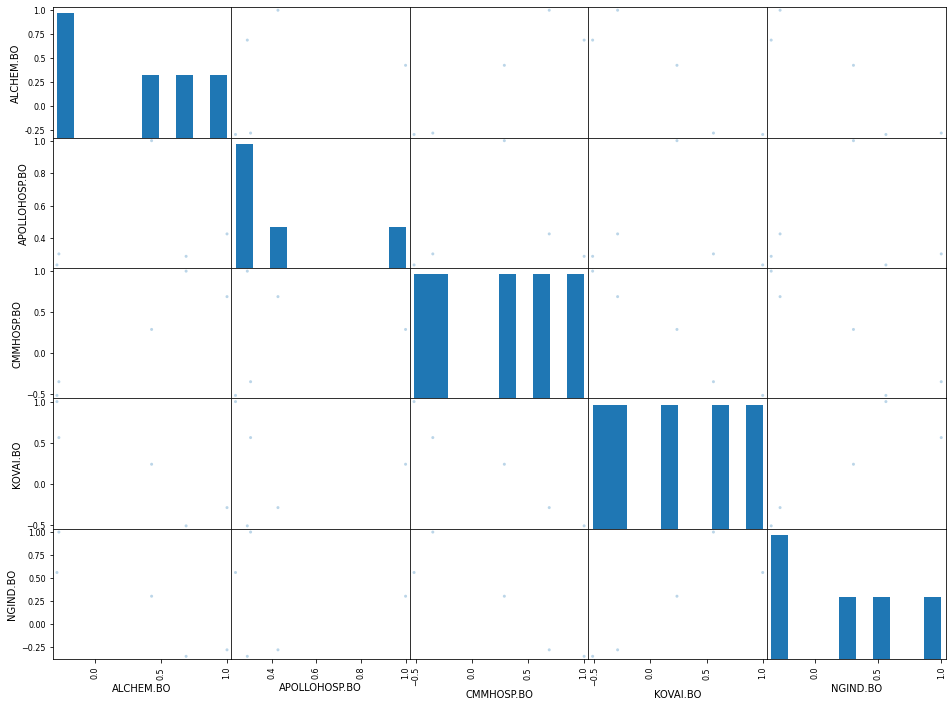

In [ ]:
from pandas.plotting import scatter_matrix 
scatter_matrix(corr_rest, figsize = (16,12), alpha = 0.3)

In [ ]:
for symbol in symbols: 
  returns = data.pct_change() 
returns.head() 

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.057778,0.012057,0.047731,-0.013855,-0.001987
2017-01-04,-0.012605,0.011415,0.038088,0.000000,0.003981
2017-01-05,-0.002128,-0.009440,0.010791,0.011100,0.003305
2017-01-06,0.031983,-0.009115,-0.007117,-0.005192,-0.022398


In [ ]:
returns = returns.dropna() 

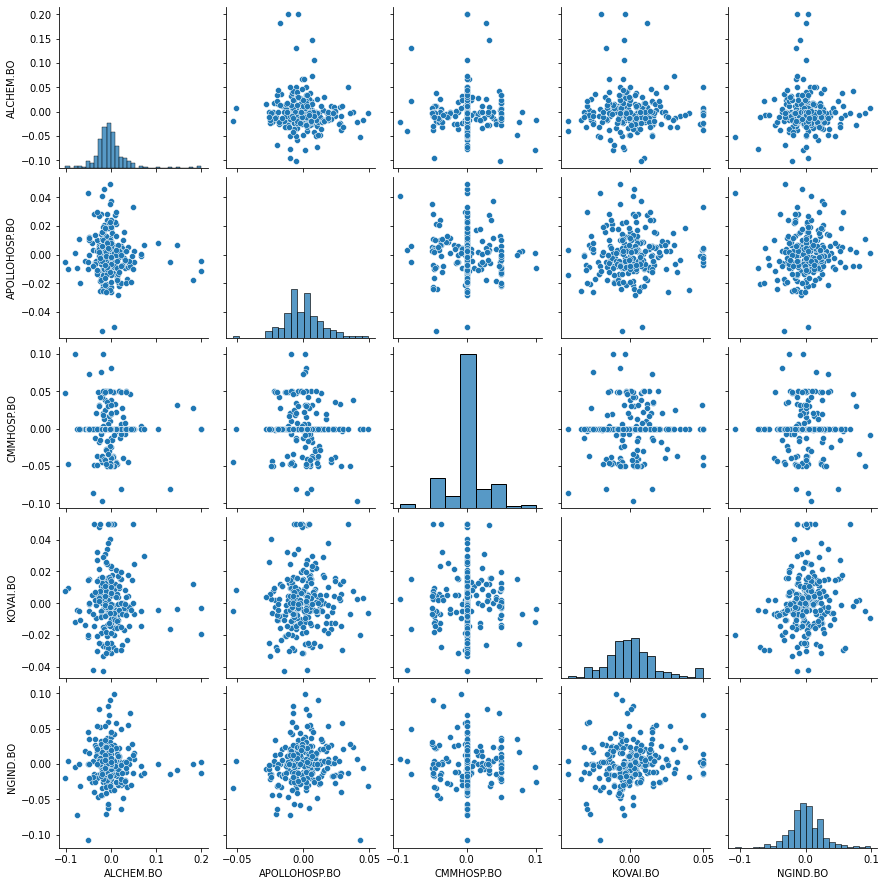

In [ ]:
sns.pairplot(returns[1:],dropna = True)

In [ ]:
# Worst Single Day Returns 
returns.idxmin()

ALCHEM.BO       2017-05-02
APOLLOHOSP.BO   2017-03-03
CMMHOSP.BO      2017-04-26
KOVAI.BO        2017-07-11
NGIND.BO        2017-08-22
dtype: datetime64[ns]

In [ ]:
# Best Single Day Returns 
returns.idxmax()

ALCHEM.BO       2017-11-14
APOLLOHOSP.BO   2017-11-21
CMMHOSP.BO      2017-04-18
KOVAI.BO        2017-09-26
NGIND.BO        2017-07-26
dtype: datetime64[ns]

In [ ]:
returns.std()

ALCHEM.BO        0.036716
APOLLOHOSP.BO    0.014635
CMMHOSP.BO       0.028566
KOVAI.BO         0.017346
NGIND.BO         0.027153
dtype: float64

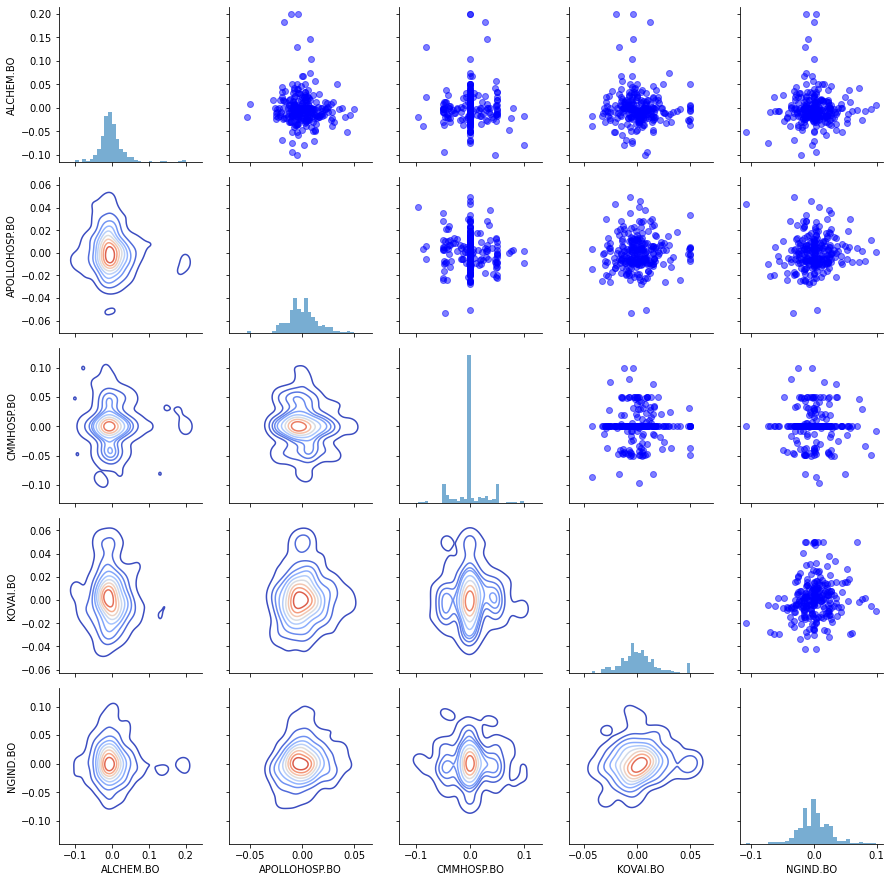

In [ ]:
returns_fig = sns.PairGrid(returns.dropna())

# Using map_upper to specify upper triangle scatter plots 
returns_fig.map_upper(plt.scatter, color = 'Blue', alpha= 0.5)

# Using lower triangle for a Kernel Density Estimate 
returns_fig.map_lower(sns.kdeplot, cmap='coolwarm')

# Diagnol will be a series of histogram plots of the daily return 
returns_fig.map_diag(plt.hist, bins = 30, alpha = 0.6)

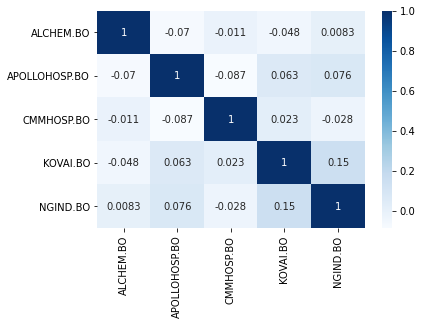

In [ ]:
sns.heatmap(returns.corr(),annot=True, cmap="Blues")



In [ ]:
rest_rets = returns.corr()
rest_rets

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000


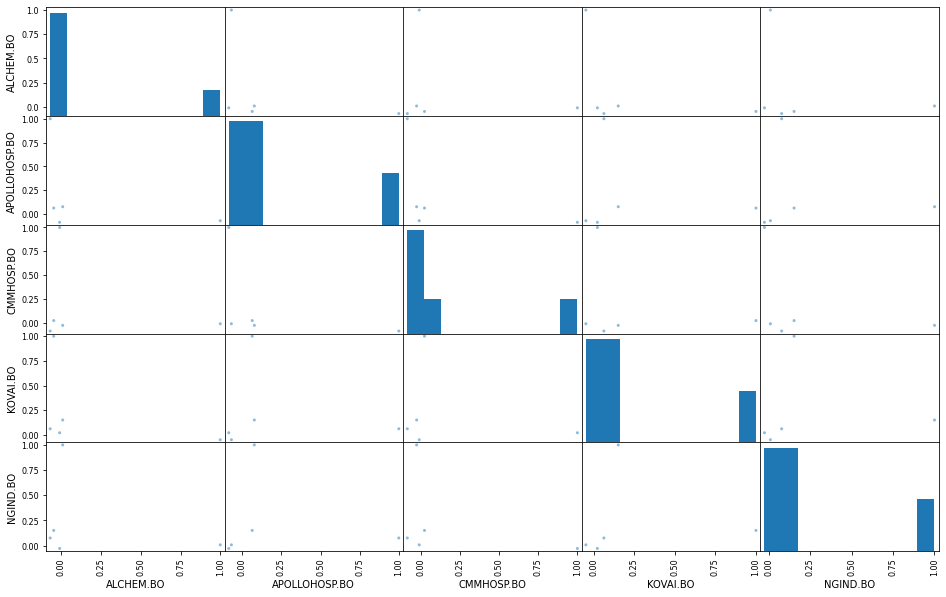

In [ ]:
# Plot Scatter Matrix

scatter_matrix(rest_rets, figsize=(16,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcadc78f250>,
      dtype=object)

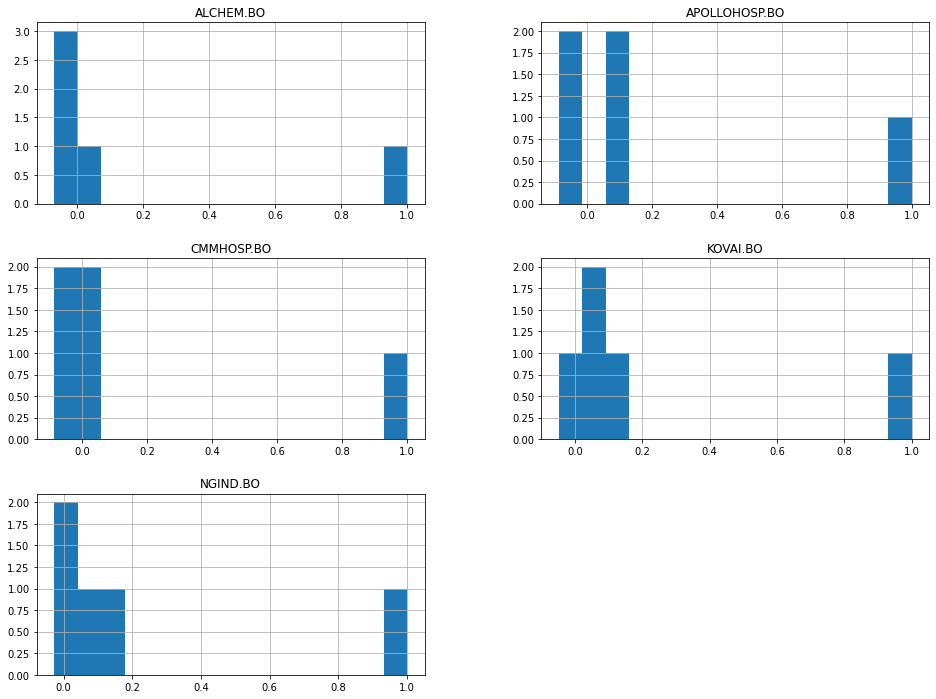

In [ ]:
rest_rets.hist(bins=15, figsize=(16,12))

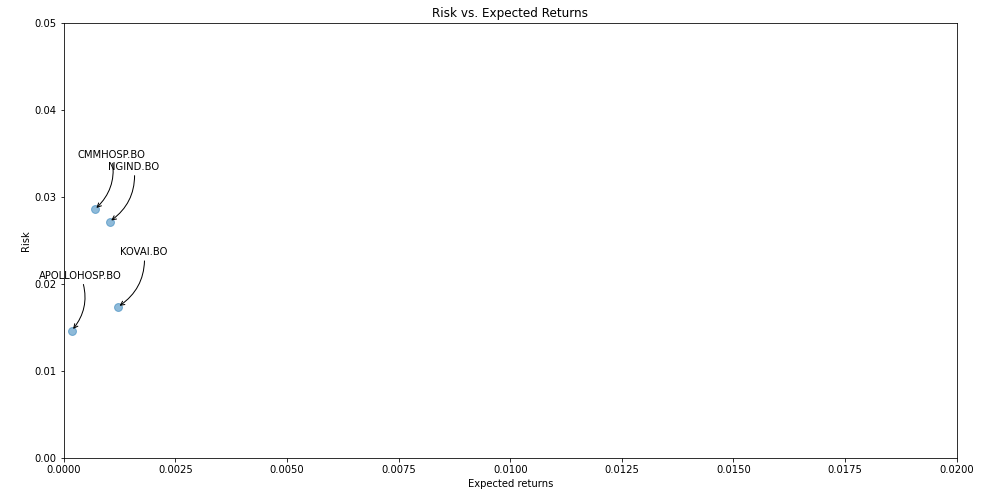

In [ ]:
rets = returns.dropna()

area = np.pi*20
plt.figure(figsize=(16,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot

plt.ylim([0.0,0.05])
plt.xlim([0.0,0.02])

# Set the plot titles for x and y axis

plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk vs. Expected Returns")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
rest_rets = returns.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

NGIND.BO       NGIND.BO         1.000000
KOVAI.BO       KOVAI.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
NGIND.BO       KOVAI.BO         0.151335
KOVAI.BO       NGIND.BO         0.151335
APOLLOHOSP.BO  CMMHOSP.BO       0.087071
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
APOLLOHOSP.BO  NGIND.BO         0.076419
NGIND.BO       APOLLOHOSP.BO    0.076419
APOLLOHOSP.BO  ALCHEM.BO        0.070287
ALCHEM.BO      APOLLOHOSP.BO    0.070287
KOVAI.BO       APOLLOHOSP.BO    0.062753
APOLLOHOSP.BO  KOVAI.BO         0.062753
KOVAI.BO       ALCHEM.BO        0.048166
ALCHEM.BO      KOVAI.BO         0.048166
CMMHOSP.BO     NGIND.BO         0.027661
NGIND.BO       CMMHOSP.BO       0.027661
CMMHOSP.BO     KOVAI.BO         0.022662
KOVAI.BO       CMMHOSP.BO       0.022662
ALCHEM.BO      CMMHOSP.BO       0.010908
CMMHOSP.BO     ALCHEM.BO        0.010908
ALCHEM.BO      NGIND.BO         0.008324
NGIND.BO       A

In [ ]:
# Normalized Returns Data
Normalized_Value = ((returns[:] - returns[:].min()) /(returns[:].max() - returns[:].min()))
Normalized_Value.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
Date,,,,,
2017-01-03,0.527371,0.635942,0.733868,0.309655,0.511419
2017-01-04,0.293477,0.629678,0.684771,0.459445,0.540244
2017-01-05,0.328295,0.426189,0.545788,0.579446,0.536976
2017-01-06,0.441651,0.429356,0.454604,0.403311,0.412838
2017-01-09,0.307901,0.483616,0.490842,0.825959,0.683743


In [ ]:
Normalized_Value.corr()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000


In [ ]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

NGIND.BO       NGIND.BO         1.000000
KOVAI.BO       KOVAI.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
NGIND.BO       KOVAI.BO         0.151335
KOVAI.BO       NGIND.BO         0.151335
APOLLOHOSP.BO  CMMHOSP.BO       0.087071
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
APOLLOHOSP.BO  NGIND.BO         0.076419
NGIND.BO       APOLLOHOSP.BO    0.076419
APOLLOHOSP.BO  ALCHEM.BO        0.070287
ALCHEM.BO      APOLLOHOSP.BO    0.070287
KOVAI.BO       APOLLOHOSP.BO    0.062753
APOLLOHOSP.BO  KOVAI.BO         0.062753
KOVAI.BO       ALCHEM.BO        0.048166
ALCHEM.BO      KOVAI.BO         0.048166
CMMHOSP.BO     NGIND.BO         0.027661
NGIND.BO       CMMHOSP.BO       0.027661
CMMHOSP.BO     KOVAI.BO         0.022662
KOVAI.BO       CMMHOSP.BO       0.022662
ALCHEM.BO      CMMHOSP.BO       0.010908
CMMHOSP.BO     ALCHEM.BO        0.010908
ALCHEM.BO      NGIND.BO         0.008324
NGIND.BO       A

In [ ]:
stocks = ['LAURUSLABS.BO','SUNPHARMA.BO','KERALAYUR.BO','UNICHEMLAB.BO','NATCOPHARM.BO']

In [ ]:
relate_industry = pdr.get_data_yahoo(stocks, start, end)["Adj Close"]

[*********************100%***********************]  5 of 5 downloaded


In [ ]:
relate_industry.head()

,KERALAYUR.BO,LAURUSLABS.BO,NATCOPHARM.BO,SUNPHARMA.BO,UNICHEMLAB.BO
Date,,,,,
2017-01-02,72.199997,92.238266,559.073120,613.582703,226.992905
2017-01-03,72.900002,90.537720,555.784058,614.742432,228.879761
2017-01-04,72.949997,90.195717,563.601379,616.288940,232.565720
2017-01-05,72.400002,90.366714,569.416748,621.750183,233.267761
2017-01-06,72.449997,89.663689,594.965454,619.527039,239.981491


In [ ]:
relate_industry.describe()

,KERALAYUR.BO,LAURUSLABS.BO,NATCOPHARM.BO,SUNPHARMA.BO,UNICHEMLAB.BO
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,85.668952,102.726592,833.062908,560.380992,238.695176
std,12.547155,7.194893,114.372950,68.305433,17.463112
min,64.550003,89.663689,555.784058,436.215881,210.753479
25%,74.687498,98.114210,742.956238,506.888664,224.858940
50%,83.299999,101.745441,871.815613,533.733428,237.162636
75%,96.099998,105.488793,930.574340,622.825531,246.651299
max,120.750000,119.133583,1030.229980,687.139099,294.300598


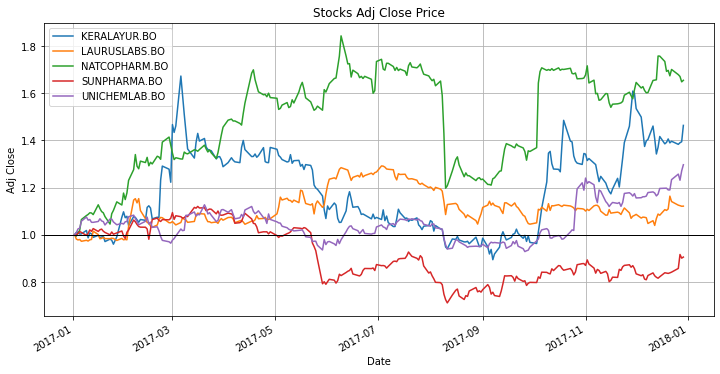

In [ ]:
normalize_stocks = relate_industry.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()

In [ ]:
corr_drinks = relate_industry.corr()
corr_drinks

,KERALAYUR.BO,LAURUSLABS.BO,NATCOPHARM.BO,SUNPHARMA.BO,UNICHEMLAB.BO
KERALAYUR.BO,1.000000,-0.148694,0.408730,0.366316,0.576545
LAURUSLABS.BO,-0.148694,1.000000,0.690955,-0.406291,-0.156741
NATCOPHARM.BO,0.408730,0.690955,1.000000,-0.285663,0.312988
SUNPHARMA.BO,0.366316,-0.406291,-0.285663,1.000000,0.177638
UNICHEMLAB.BO,0.576545,-0.156741,0.312988,0.177638,1.000000


In [ ]:
LAURUSLABS = data 
LAURUSLABS = LAURUSLABS.assign(LAURUSLABS = relate_industry['LAURUSLABS.BO'].values)
LAURUSLABS.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,LAURUSLABS
Date,,,,,,
2017-01-02,22.500000,1169.544922,12.78,996.454407,64.997261,92.238266
2017-01-03,23.799999,1183.646606,13.39,982.648315,64.868126,90.537720
2017-01-04,23.500000,1197.158447,13.90,982.648315,65.126396,90.195717
2017-01-05,23.450001,1185.857422,14.05,993.555542,65.341621,90.366714
2017-01-06,24.200001,1175.047974,13.95,988.396729,63.878101,89.663689


In [ ]:
LAURUSLABS_rets = LAURUSLABS.pct_change().dropna() 
LAURUSLABS_rets.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,LAURUSLABS
Date,,,,,,
2017-01-03,0.057778,0.012057,0.047731,-0.013855,-0.001987,-0.018436
2017-01-04,-0.012605,0.011415,0.038088,0.000000,0.003981,-0.003777
2017-01-05,-0.002128,-0.009440,0.010791,0.011100,0.003305,0.001896
2017-01-06,0.031983,-0.009115,-0.007117,-0.005192,-0.022398,-0.007780
2017-01-09,-0.008265,-0.003554,0.000000,0.033902,0.033693,0.004344


In [ ]:
LAURUSLABS_rets.corr()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,LAURUSLABS
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324,0.026000
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419,0.212371
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661,0.094922
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335,-0.050606
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000,0.104298
LAURUSLABS,0.026000,0.212371,0.094922,-0.050606,0.104298,1.000000


In [ ]:
LAURUSLABS_rets = LAURUSLABS_rets.corr() 
pair_value_1 = LAURUSLABS_rets.abs().unstack()
pair_value_1.sort_values(ascending = False)

LAURUSLABS     LAURUSLABS       1.000000
NGIND.BO       NGIND.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
KOVAI.BO       KOVAI.BO         1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
APOLLOHOSP.BO  LAURUSLABS       0.212371
LAURUSLABS     APOLLOHOSP.BO    0.212371
KOVAI.BO       NGIND.BO         0.151335
NGIND.BO       KOVAI.BO         0.151335
               LAURUSLABS       0.104298
LAURUSLABS     NGIND.BO         0.104298
               CMMHOSP.BO       0.094922
CMMHOSP.BO     LAURUSLABS       0.094922
APOLLOHOSP.BO  CMMHOSP.BO       0.087071
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
APOLLOHOSP.BO  NGIND.BO         0.076419
NGIND.BO       APOLLOHOSP.BO    0.076419
ALCHEM.BO      APOLLOHOSP.BO    0.070287
APOLLOHOSP.BO  ALCHEM.BO        0.070287
KOVAI.BO       APOLLOHOSP.BO    0.062753
APOLLOHOSP.BO  KOVAI.BO         0.062753
LAURUSLABS     KOVAI.BO         0.050606
KOVAI.BO       LAURUSLABS       0.050606
               A

In [ ]:
KERALAYUR = data 
KERALAYUR = KERALAYUR.join(relate_industry['KERALAYUR.BO'])
KERALAYUR.head() 

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,KERALAYUR.BO
Date,,,,,,
2017-01-02,22.500000,1169.544922,12.78,996.454407,64.997261,72.199997
2017-01-03,23.799999,1183.646606,13.39,982.648315,64.868126,72.900002
2017-01-04,23.500000,1197.158447,13.90,982.648315,65.126396,72.949997
2017-01-05,23.450001,1185.857422,14.05,993.555542,65.341621,72.400002
2017-01-06,24.200001,1175.047974,13.95,988.396729,63.878101,72.449997


In [ ]:
KERALAYUR_rets = KERALAYUR.pct_change().dropna()
KERALAYUR_rets.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,KERALAYUR.BO
Date,,,,,,
2017-01-03,0.057778,0.012057,0.047731,-0.013855,-0.001987,0.009695
2017-01-04,-0.012605,0.011415,0.038088,0.000000,0.003981,0.000686
2017-01-05,-0.002128,-0.009440,0.010791,0.011100,0.003305,-0.007539
2017-01-06,0.031983,-0.009115,-0.007117,-0.005192,-0.022398,0.000691
2017-01-09,-0.008265,-0.003554,0.000000,0.033902,0.033693,0.014493


In [ ]:
KERALAYUR_rets.corr()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,KERALAYUR.BO
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324,-0.056069
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419,0.100725
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661,-0.021828
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335,-0.014115
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000,0.092880
KERALAYUR.BO,-0.056069,0.100725,-0.021828,-0.014115,0.092880,1.000000


In [ ]:
KERALAYUR_rets = KERALAYUR_rets.corr() 
pair_value_2 = KERALAYUR_rets.abs().unstack() 
pair_value_2.sort_values(ascending = False)

KERALAYUR.BO   KERALAYUR.BO     1.000000
NGIND.BO       NGIND.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
KOVAI.BO       KOVAI.BO         1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
KOVAI.BO       NGIND.BO         0.151335
NGIND.BO       KOVAI.BO         0.151335
APOLLOHOSP.BO  KERALAYUR.BO     0.100725
KERALAYUR.BO   APOLLOHOSP.BO    0.100725
NGIND.BO       KERALAYUR.BO     0.092880
KERALAYUR.BO   NGIND.BO         0.092880
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
APOLLOHOSP.BO  CMMHOSP.BO       0.087071
NGIND.BO       APOLLOHOSP.BO    0.076419
APOLLOHOSP.BO  NGIND.BO         0.076419
               ALCHEM.BO        0.070287
ALCHEM.BO      APOLLOHOSP.BO    0.070287
KOVAI.BO       APOLLOHOSP.BO    0.062753
APOLLOHOSP.BO  KOVAI.BO         0.062753
KERALAYUR.BO   ALCHEM.BO        0.056069
ALCHEM.BO      KERALAYUR.BO     0.056069
               KOVAI.BO         0.048166
KOVAI.BO       ALCHEM.BO        0.048166
CMMHOSP.BO     N

In [ ]:
NATCOPHARM = pd.concat([data, relate_industry['NATCOPHARM.BO']], axis = 1)
NATCOPHARM.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,NATCOPHARM.BO
Date,,,,,,
2017-01-02,22.500000,1169.544922,12.78,996.454407,64.997261,559.073120
2017-01-03,23.799999,1183.646606,13.39,982.648315,64.868126,555.784058
2017-01-04,23.500000,1197.158447,13.90,982.648315,65.126396,563.601379
2017-01-05,23.450001,1185.857422,14.05,993.555542,65.341621,569.416748
2017-01-06,24.200001,1175.047974,13.95,988.396729,63.878101,594.965454


In [ ]:
NATCOPHARM_rets = NATCOPHARM.pct_change().dropna() 
NATCOPHARM_rets.head() 

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,NATCOPHARM.BO
Date,,,,,,
2017-01-03,0.057778,0.012057,0.047731,-0.013855,-0.001987,-0.005883
2017-01-04,-0.012605,0.011415,0.038088,0.000000,0.003981,0.014065
2017-01-05,-0.002128,-0.009440,0.010791,0.011100,0.003305,0.010318
2017-01-06,0.031983,-0.009115,-0.007117,-0.005192,-0.022398,0.044868
2017-01-09,-0.008265,-0.003554,0.000000,0.033902,0.033693,0.015943


In [ ]:
NATCOPHARM_rets.corr()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,NATCOPHARM.BO
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324,0.087753
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419,0.105427
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661,-0.055281
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335,0.036342
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000,0.014973
NATCOPHARM.BO,0.087753,0.105427,-0.055281,0.036342,0.014973,1.000000


In [ ]:
NATCOPHARM_rets = NATCOPHARM_rets.corr() 
pair_value_3 = NATCOPHARM_rets.abs().unstack() 
pair_value_3.sort_values(ascending = False)

NATCOPHARM.BO  NATCOPHARM.BO    1.000000
NGIND.BO       NGIND.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
KOVAI.BO       KOVAI.BO         1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
NGIND.BO       KOVAI.BO         0.151335
KOVAI.BO       NGIND.BO         0.151335
NATCOPHARM.BO  APOLLOHOSP.BO    0.105427
APOLLOHOSP.BO  NATCOPHARM.BO    0.105427
NATCOPHARM.BO  ALCHEM.BO        0.087753
ALCHEM.BO      NATCOPHARM.BO    0.087753
APOLLOHOSP.BO  CMMHOSP.BO       0.087071
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
NGIND.BO       APOLLOHOSP.BO    0.076419
APOLLOHOSP.BO  NGIND.BO         0.076419
ALCHEM.BO      APOLLOHOSP.BO    0.070287
APOLLOHOSP.BO  ALCHEM.BO        0.070287
KOVAI.BO       APOLLOHOSP.BO    0.062753
APOLLOHOSP.BO  KOVAI.BO         0.062753
NATCOPHARM.BO  CMMHOSP.BO       0.055281
CMMHOSP.BO     NATCOPHARM.BO    0.055281
KOVAI.BO       ALCHEM.BO        0.048166
ALCHEM.BO      KOVAI.BO         0.048166
NATCOPHARM.BO  K

In [ ]:
SUNPHARMA = pd.concat([data, relate_industry['SUNPHARMA.BO']], axis = 1)
SUNPHARMA.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,SUNPHARMA.BO
Date,,,,,,
2017-01-02,22.500000,1169.544922,12.78,996.454407,64.997261,613.582703
2017-01-03,23.799999,1183.646606,13.39,982.648315,64.868126,614.742432
2017-01-04,23.500000,1197.158447,13.90,982.648315,65.126396,616.288940
2017-01-05,23.450001,1185.857422,14.05,993.555542,65.341621,621.750183
2017-01-06,24.200001,1175.047974,13.95,988.396729,63.878101,619.527039


In [ ]:
SUNPHARMA_rets = SUNPHARMA.pct_change().dropna() 
SUNPHARMA_rets.head() 

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,SUNPHARMA.BO
Date,,,,,,
2017-01-03,0.057778,0.012057,0.047731,-0.013855,-0.001987,0.001890
2017-01-04,-0.012605,0.011415,0.038088,0.000000,0.003981,0.002516
2017-01-05,-0.002128,-0.009440,0.010791,0.011100,0.003305,0.008861
2017-01-06,0.031983,-0.009115,-0.007117,-0.005192,-0.022398,-0.003576
2017-01-09,-0.008265,-0.003554,0.000000,0.033902,0.033693,-0.012559


In [ ]:
SUNPHARMA_rets.corr()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,SUNPHARMA.BO
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324,0.066009
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419,0.140245
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661,-0.025184
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335,-0.030392
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000,0.050304
SUNPHARMA.BO,0.066009,0.140245,-0.025184,-0.030392,0.050304,1.000000


In [ ]:
SUNPHARMA_rets = SUNPHARMA_rets.corr()
pair_value_4 = SUNPHARMA_rets.abs().unstack() 
pair_value_4.sort_values(ascending = False)

SUNPHARMA.BO   SUNPHARMA.BO     1.000000
NGIND.BO       NGIND.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
KOVAI.BO       KOVAI.BO         1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
NGIND.BO       KOVAI.BO         0.151335
KOVAI.BO       NGIND.BO         0.151335
SUNPHARMA.BO   APOLLOHOSP.BO    0.140245
APOLLOHOSP.BO  SUNPHARMA.BO     0.140245
               CMMHOSP.BO       0.087071
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
NGIND.BO       APOLLOHOSP.BO    0.076419
APOLLOHOSP.BO  NGIND.BO         0.076419
ALCHEM.BO      APOLLOHOSP.BO    0.070287
APOLLOHOSP.BO  ALCHEM.BO        0.070287
ALCHEM.BO      SUNPHARMA.BO     0.066009
SUNPHARMA.BO   ALCHEM.BO        0.066009
APOLLOHOSP.BO  KOVAI.BO         0.062753
KOVAI.BO       APOLLOHOSP.BO    0.062753
NGIND.BO       SUNPHARMA.BO     0.050304
SUNPHARMA.BO   NGIND.BO         0.050304
ALCHEM.BO      KOVAI.BO         0.048166
KOVAI.BO       ALCHEM.BO        0.048166
SUNPHARMA.BO   K

In [ ]:
UNICHEMLAB = pd.concat([data, relate_industry['UNICHEMLAB.BO']], axis = 1)
UNICHEMLAB.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,UNICHEMLAB.BO
Date,,,,,,
2017-01-02,22.500000,1169.544922,12.78,996.454407,64.997261,226.992905
2017-01-03,23.799999,1183.646606,13.39,982.648315,64.868126,228.879761
2017-01-04,23.500000,1197.158447,13.90,982.648315,65.126396,232.565720
2017-01-05,23.450001,1185.857422,14.05,993.555542,65.341621,233.267761
2017-01-06,24.200001,1175.047974,13.95,988.396729,63.878101,239.981491


In [ ]:
UNICHEMLAB_rets = UNICHEMLAB.pct_change().dropna()
UNICHEMLAB_rets.head()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,UNICHEMLAB.BO
Date,,,,,,
2017-01-03,0.057778,0.012057,0.047731,-0.013855,-0.001987,0.008312
2017-01-04,-0.012605,0.011415,0.038088,0.000000,0.003981,0.016104
2017-01-05,-0.002128,-0.009440,0.010791,0.011100,0.003305,0.003019
2017-01-06,0.031983,-0.009115,-0.007117,-0.005192,-0.022398,0.028781
2017-01-09,-0.008265,-0.003554,0.000000,0.033902,0.033693,0.016639


In [ ]:
UNICHEMLAB_rets.corr()

,ALCHEM.BO,APOLLOHOSP.BO,CMMHOSP.BO,KOVAI.BO,NGIND.BO,UNICHEMLAB.BO
ALCHEM.BO,1.000000,-0.070287,-0.010908,-0.048166,0.008324,-0.046117
APOLLOHOSP.BO,-0.070287,1.000000,-0.087071,0.062753,0.076419,0.031895
CMMHOSP.BO,-0.010908,-0.087071,1.000000,0.022662,-0.027661,0.077856
KOVAI.BO,-0.048166,0.062753,0.022662,1.000000,0.151335,0.022675
NGIND.BO,0.008324,0.076419,-0.027661,0.151335,1.000000,0.022574
UNICHEMLAB.BO,-0.046117,0.031895,0.077856,0.022675,0.022574,1.000000


In [ ]:
UNICHEMLAB_rets = UNICHEMLAB_rets.corr()
pair_value_5 = UNICHEMLAB_rets.abs().unstack() 
pair_value_5.sort_values(ascending = False)

UNICHEMLAB.BO  UNICHEMLAB.BO    1.000000
NGIND.BO       NGIND.BO         1.000000
APOLLOHOSP.BO  APOLLOHOSP.BO    1.000000
CMMHOSP.BO     CMMHOSP.BO       1.000000
KOVAI.BO       KOVAI.BO         1.000000
ALCHEM.BO      ALCHEM.BO        1.000000
KOVAI.BO       NGIND.BO         0.151335
NGIND.BO       KOVAI.BO         0.151335
APOLLOHOSP.BO  CMMHOSP.BO       0.087071
CMMHOSP.BO     APOLLOHOSP.BO    0.087071
UNICHEMLAB.BO  CMMHOSP.BO       0.077856
CMMHOSP.BO     UNICHEMLAB.BO    0.077856
NGIND.BO       APOLLOHOSP.BO    0.076419
APOLLOHOSP.BO  NGIND.BO         0.076419
ALCHEM.BO      APOLLOHOSP.BO    0.070287
APOLLOHOSP.BO  ALCHEM.BO        0.070287
KOVAI.BO       APOLLOHOSP.BO    0.062753
APOLLOHOSP.BO  KOVAI.BO         0.062753
KOVAI.BO       ALCHEM.BO        0.048166
ALCHEM.BO      KOVAI.BO         0.048166
               UNICHEMLAB.BO    0.046117
UNICHEMLAB.BO  ALCHEM.BO        0.046117
APOLLOHOSP.BO  UNICHEMLAB.BO    0.031895
UNICHEMLAB.BO  APOLLOHOSP.BO    0.031895
NGIND.BO       C

*References:* 

*   Historical Data of Stocks from Yahoo Finance
*   Tin Hang, Financial ML, Data exp.




Following the Data exploration we perform a Co-Integration Analysis of the time series data and infer various performance measures to evaluate our trading strategy. 

---